<a href="https://colab.research.google.com/github/RyanAleixo/Profiss-o-Cientista-de-Dados-v2/blob/main/MOD40_EXERCICIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 39 - Exercicio - Aplicando SVM**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros. A mesma que também usamos na tarefa de XGboost!


In [1]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from google.colab import files
import io

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [2]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]), delimiter=',')
print(df.head())

print("--- Info da Base ---")
print(df.info())
print("\nDados Faltantes:\n", df.isnull().sum())

df.drop('User ID', axis=1, inplace=True)



Saving CARRO_CLIENTES.csv to CARRO_CLIENTES.csv
   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0
--- Info da Base ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB
None

Dados Faltantes:
 User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64


# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [3]:
le = LabelEncoder()
df['Gender_Encoded'] = le.fit_transform(df['Gender'])
df.drop('Gender', axis=1, inplace=True)

# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

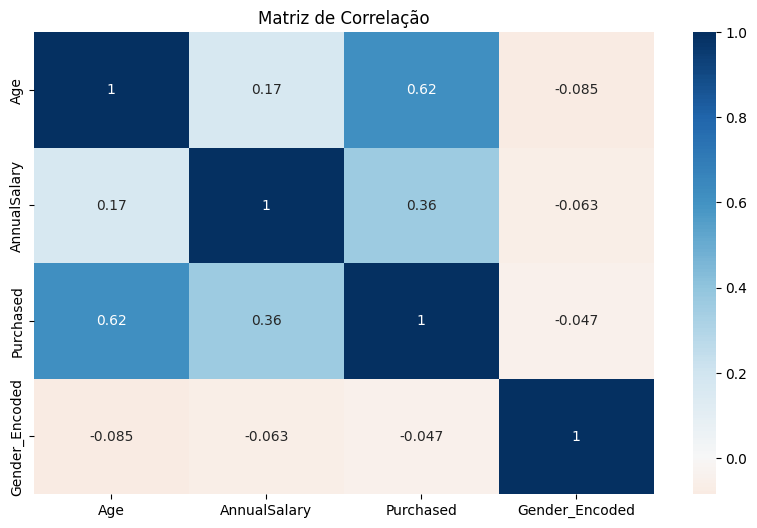

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='RdBu', center=0)
plt.title("Matriz de Correlação")
plt.show()

# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [5]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Todos passos até aqui vocês realizaram na tarefa anterior também!**

# 5. Treino o modelo SVM com sua base de treino.
Esse modelo deve ser treinado usando o kernel linear.

In [6]:
modelo_svm = SVC(kernel='linear', random_state=42)

modelo_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

# 6. Realize as previsões para a base de teste e traga a avaliação.

--- Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       138
           1       0.87      0.69      0.77       112

    accuracy                           0.81       250
   macro avg       0.82      0.80      0.80       250
weighted avg       0.82      0.81      0.81       250

Acurácia: 0.81


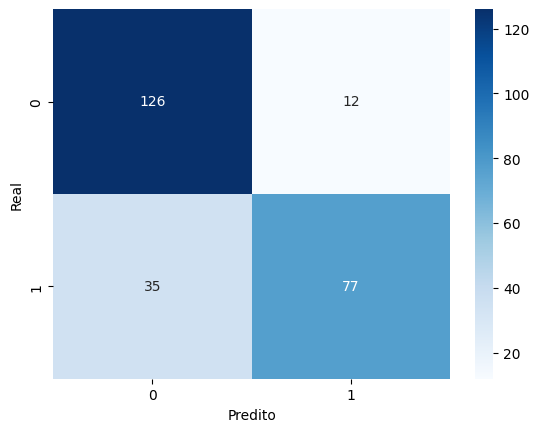

In [7]:
y_pred = modelo_svm.predict(X_test)

print("--- Relatório de Classificação ---")
print(classification_report(y_test, y_pred))

print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")

# Matriz de Confusão para ver erros de Falso Positivo e Falso Negativo
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# 7. Treine um novo modelo SVM com sua base de treino + realize as previsões e avalições.
Esse modelo dedve ser treinado usando o kernel poly.

--- Relatório de Classificação (Kernel Poly) ---
              precision    recall  f1-score   support

           0       0.66      0.96      0.78       138
           1       0.88      0.39      0.54       112

    accuracy                           0.70       250
   macro avg       0.77      0.67      0.66       250
weighted avg       0.76      0.70      0.67       250



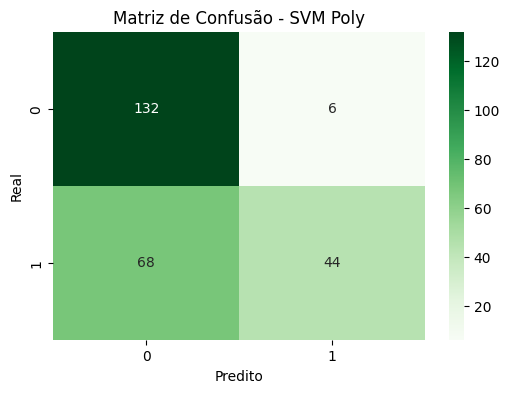

In [8]:
modelo_svm_poly = SVC(kernel='poly', degree=3, random_state=42)

modelo_svm_poly.fit(X_train, y_train)

y_pred_poly = modelo_svm_poly.predict(X_test)

print("--- Relatório de Classificação (Kernel Poly) ---")
print(classification_report(y_test, y_pred_poly))

# Matriz de Confusão para comparação visual
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_poly), annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusão - SVM Poly')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# 8. Qual modelo se saiu melhor? O SVM com kernel linear ou poly? Compare também com o XGboost, da atividade anterior, você obteve melhores previsões com qual dos modelos?

**Comparação SVM Linear vs. Poly**: O SVM Linear (0.81) foi superior ao Poly (0.70).

**Comparação com o XGBoost (0.89)**: O XGBoost superou ambos por uma margem considerável.